### 補空值用

In [48]:
import numpy as np
import pandas as pd

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
data = pd.read_csv('gurus_ML.csv')

In [51]:
data.head()

,Unnamed: 0,Title,Year,Brand,Location,State,Rental,Price,Mileage,Transmission,FuelType,Engine,Drivetrain,OptionCount,MajorOptions,Accident Check,OwnershipHistory
0,2,Silverado 2500HD Work Truck Extended Cab LB 4WD,2010,Chevrolet,Frankfort,KY,False,15900.0,144000.0,Automatic,Gasoline,V8,Four-Wheel Drive,2,"['Steel Wheels', 'Tow Package']",0.0,2.0
1,3,Corvette Stingray 3LT Coupe RWD,2014,Chevrolet,Lewistown,MT,False,49995.0,2500.0,7-Speed Manual,Gasoline,V8,Rear-Wheel Drive,5,"['Bluetooth', 'Backup Camera', 'Aluminum Wheel...",0.0,1.0
2,4,Monte Carlo SS FWD,2002,Chevrolet,Delavan,IL,False,3440.0,174000.0,Automatic,Gasoline,V6,Front-Wheel Drive,2,"['Leather Seats', 'Aluminum Wheels']",0.0,2.0
3,5,Monte Carlo LS FWD,2004,Chevrolet,Delavan,IL,False,4890.0,115500.0,Automatic,Gasoline,V6,Front-Wheel Drive,1,['Steel Wheels'],0.0,3.0
4,7,Silverado 1500 LT Extended Cab RWD,2001,Chevrolet,Delavan,IL,False,6550.0,188583.0,Automatic,Gasoline,V8,Rear-Wheel Drive,3,"['Leather Seats', 'Suspension Package', 'Alumi...",0.0,1.0


In [52]:
data.columns

Index(['Unnamed: 0', 'Title', 'Year', 'Brand', 'Location', 'State', 'Rental',
       'Price', 'Mileage', 'Transmission', 'FuelType', 'Engine', 'Drivetrain',
       'OptionCount', 'MajorOptions', 'Accident Check', 'OwnershipHistory'],
      dtype='object')

In [53]:
# Price 和 Mileage 欄位有空值, 把資料分開 , Price有空值的分一份 , Mileage 有空值的分一份
# 完全沒空值的分一份 (資料中 , Price 和 Mileage 至少會有一個有值,不會有兩個空值)

In [54]:
price_empty = data['Price'].isnull()

In [55]:
y_need_pred = data[price_empty].iloc[:,7]
# y_need_pred 全為 NaN

In [56]:
X_need_pred = data[price_empty].iloc[:,[2,8,13,15,16]]
# X_need_pred 是那些 price 是空值的資料

In [57]:
X_need_pred.head()

,Year,Mileage,OptionCount,Accident Check,OwnershipHistory
28,2008,98056.0,1,0.0,1.0
29,2007,94225.0,2,0.0,2.0
50,2004,789.0,0,0.0,3.0
63,2013,44927.0,2,0.0,2.0
64,2012,66175.0,6,0.0,4.0


In [58]:
data['Price'].isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
2088473     True
2088474    False
2088475    False
2088476    False
2088477    False
Name: Price, Length: 2088478, dtype: bool

In [59]:
data.notnull().all(axis=1)

0           True
1           True
2           True
3           True
4           True
           ...  
2088473    False
2088474     True
2088475    False
2088476    False
2088477    False
Length: 2088478, dtype: bool

In [60]:
data.notnull().any(axis=1)

0          True
1          True
2          True
3          True
4          True
           ... 
2088473    True
2088474    True
2088475    True
2088476    True
2088477    True
Length: 2088478, dtype: bool

In [61]:
both_has = data.notnull().all(axis=1)

In [62]:
y_train = data[both_has].iloc[:,7]

In [63]:
X_train = data[both_has].iloc[:,[2,8,13,15,16]]

In [64]:
# X_train 和 y_train 裡的資料,都是 Price 和 Mileage 皆"非"空值 ,因為他們是要丟進模型訓練 ,不能有空值

In [65]:
len(X_train) == len(y_train)

True

In [66]:
len(X_train)

1985511

In [67]:
X_train.dtypes

Year                  int64
Mileage             float64
OptionCount           int64
Accident Check      float64
OwnershipHistory    float64
dtype: object

In [68]:
y_train.dtypes

dtype('float64')

In [69]:
y_train.astype('int')

0          15900
1          49995
2           3440
3           4890
4           6550
           ...  
2088468     6495
2088469     8745
2088470    13916
2088471     5500
2088474    11980
Name: Price, Length: 1985511, dtype: int32

In [70]:
X_train_columns = list(X_train.columns)

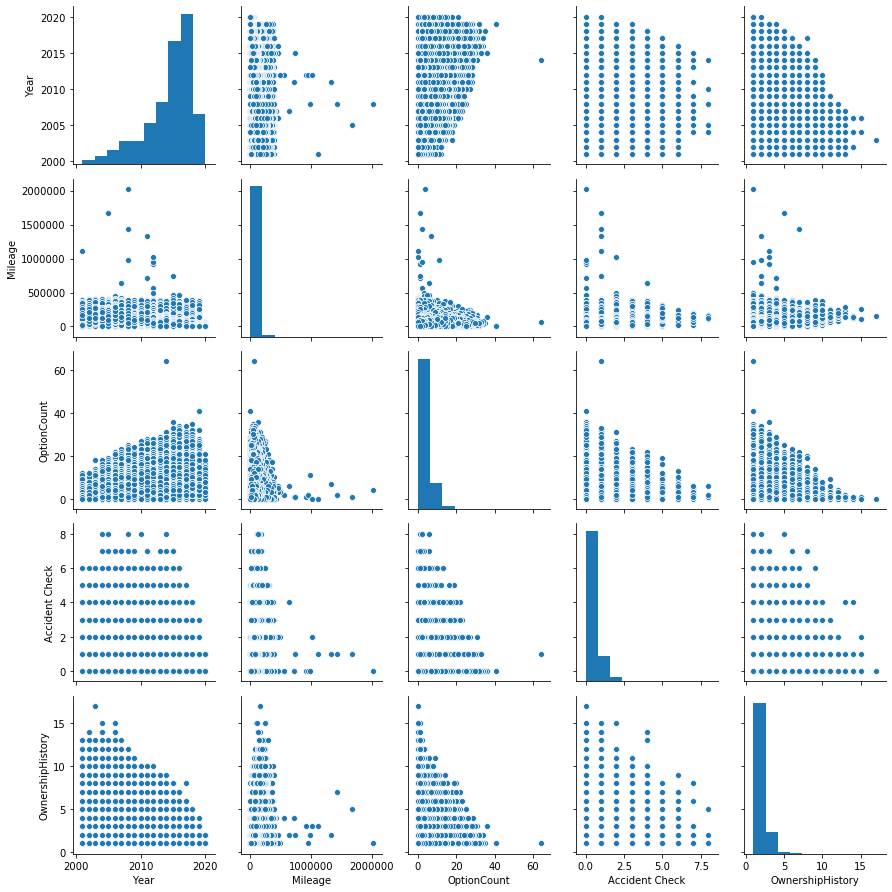

In [71]:
sns.pairplot(data[X_train_columns], height=2.5)
plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()

In [72]:
cm = np.corrcoef(data[X_train_columns].values.T)
#sns.set(font_scale=1.5)

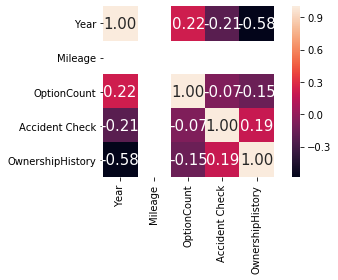

In [73]:
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=X_train_columns,
                 xticklabels=X_train_columns)

plt.tight_layout()
# plt.savefig('images/10_04.png', dpi=300)
plt.show()

In [74]:
X_train.isnull().sum()

Year                0
Mileage             0
OptionCount         0
Accident Check      0
OwnershipHistory    0
dtype: int64

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
slr = LinearRegression()

In [77]:
slr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
y_pred = slr.predict(X_need_pred)

In [79]:
y_pred

array([10690.20335214, 11809.04712038, 17606.95020255, ...,
       15931.70996071, 25223.0220087 , 21837.74801086])

In [80]:
pd.DataFrame(y_pred)

,0
0,10690.203352
1,11809.047120
2,17606.950203
3,19771.486074
4,21664.035867
...,...
90154,22922.489752
90155,25325.963305
90156,15931.709961
90157,25223.022009


In [81]:
y_pred.max()

49079.29403781658

In [82]:
y_pred.mean()

16683.3156339503

In [83]:
# 多項式迴歸

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_train, test_size=0.3, random_state=1)

In [86]:
# 為了確認迴歸模型的效果如何, 將訓練用的資料(也就是所有欄位都有值的資料),再切成訓練用和測試用資料
# 下面是用多項式模型,不是一般線性迴歸
# 線性迴歸轉多項式迴歸 見python 機器學習 p323

In [87]:
from sklearn.preprocessing import PolynomialFeatures

In [88]:
from sklearn.metrics import r2_score

In [89]:
quadratic = PolynomialFeatures(degree=2)

In [90]:
#PolynomialFeatures?

In [91]:
pr = LinearRegression()

In [92]:
quadratic = PolynomialFeatures(degree=4)

In [93]:
X_quad = quadratic.fit_transform(X_train_split)

In [94]:
pr.fit(X_quad,y_train_split)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
y_train_split_pred = pr.predict(quadratic.fit_transform(X_test_split))

In [96]:
r2_score(y_test_split,y_train_split_pred)

0.23506873949405016

In [97]:
# degree = 2 , 4
# degree = 2 ,r2_score = 0.23021886745842168
# degree = 4 ,r2_score = 0.23506873949405016
# degree = 5 或 6時  r2 score 出現負數

In [98]:
# PolynomialFeatures?

In [99]:
# 用隨機森林迴歸來預測

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
quadratic = PolynomialFeatures(degree=2)

In [102]:
X_train_split_quad = quadratic.fit_transform(X_train_split)

In [103]:
forest = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=1, n_jobs=-1)

In [104]:
forest.fit(X_train_split_quad,y_train_split)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [105]:
y_pred_forest = forest.predict(quadratic.fit_transform(X_test_split))

In [106]:
r2_score(y_test_split,y_pred_forest)

0.14571313262751506

In [107]:
# 10棵樹 不用多項式 r2_score = 0.08484769131518277
# 100棵樹 用多項式 r2_score = 0.14571313262751506